# Funnel Analysis

### Introduction

A last step in our analysis may be some funnel analysis.  Here we want to try to determine why users do or do not continue on with the customer journey.

### Making initial selections

In [2]:
from lib import *
import pandas as pd

engine, df = load_data()

* Finding what leads to repeat purchases

Write a query to select the line item that is the first line item of users who have multiple line items.

In [4]:
query = """
WITH orders_count AS (
    SELECT user_id, list_sku, list_sku_category, list_sku_flavor, 
    order_coupon_code, order_referrer, order_channel, order_ad_shown,
    order_is_freeshipping, order_coupon_code, user_loyalty_program, order_value,
       COUNT(user_id) OVER
         (PARTITION BY user_id ORDER BY order_date)
         AS running_order_count,
        COUNT(user_id) OVER
         (PARTITION BY user_id)
         AS total_order_count
  FROM raw_lineitems
)
select * from orders_count 
where total_order_count = 2 and running_order_count = 1
"""
first_for_repurchases_df = pd.read_sql(query, engine)
first_for_repurchases_df[:2]

user_id  list_sku list_sku_category    list_sku_flavor  \
0  USER-16929017  SKU-5018      Low-Carb Bar       Apple Banana   
1  USER-16929034  SKU-5005    Protein Powder  Cookies and Cream   

  order_coupon_code order_referrer      order_channel order_ad_shown  \
0          express5            IAC           in_store      week37_ 2   
1         express10         Yahoo!  digital_wholesale      week45_ 5   

   order_is_freeshipping order_coupon_code user_loyalty_program  order_value  \
0                      0          express5               silver    10.852917   
1                      0         express10                 none     7.629942   

   running_order_count  total_order_count  
0                    1                  2  
1                    1                  2

> What are some issues with the query above.  What should we do to improve it?

* Finding causes of attrition

Then write a query to select the last line item of purchases.

In [5]:
query = """
WITH orders_count AS (
    SELECT list_sku, list_sku_category, list_sku_flavor, order_value,
       COUNT(user_id) OVER
         (PARTITION BY user_id ORDER BY order_date)
         AS running_order_count,
        COUNT(user_id) OVER
         (PARTITION BY user_id)
         AS total_order_count
  FROM raw_orders
)
select * from orders_count 
where running_order_count = total_order_count
"""

last_purchase_df = pd.read_sql(query, engine)

last_purchase_df[:1]


list_sku list_sku_category list_sku_flavor  order_value  \
0  SKU-3013       Granola Bar   Peanut Butter    25.450311   

   running_order_count  total_order_count  
0                    1                  1

### Doing analysis

Now that we have selected the relevant line items, again use the group and print functions to see the differences in the kinds of products that are associated with more purchases, as opposed to those that are the last purchase by a user.

list_sku


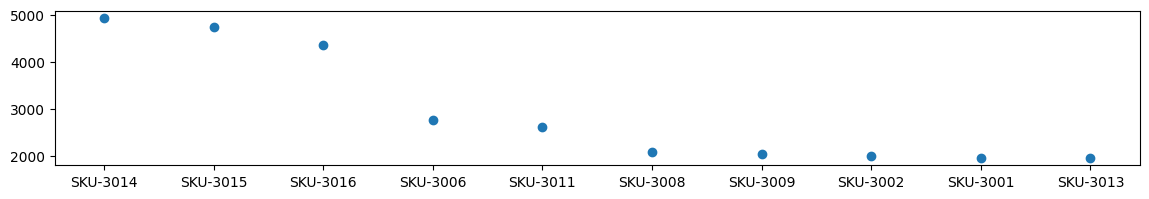

list_sku_category


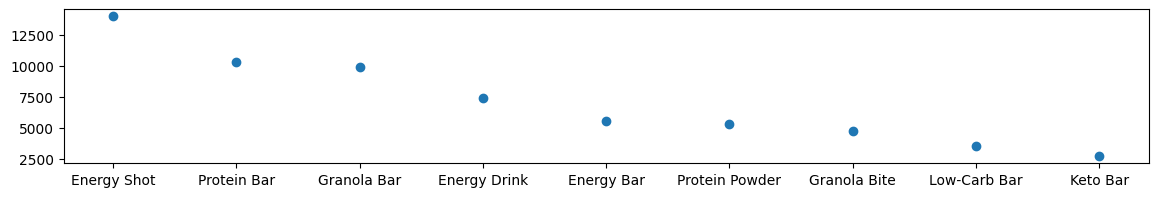

list_sku_flavor


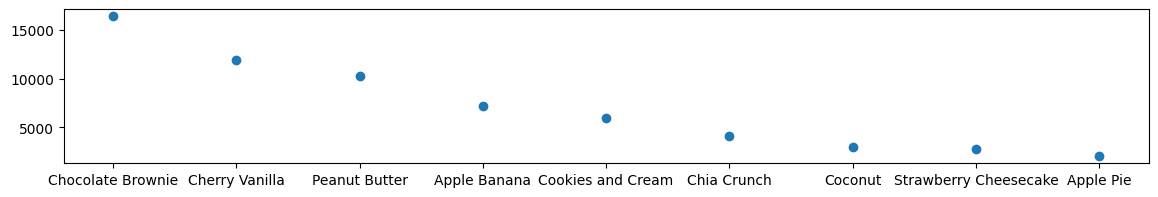

In [39]:
from lib import product_cols

group_and_print(first_for_repurchases_df, product_cols)


list_sku


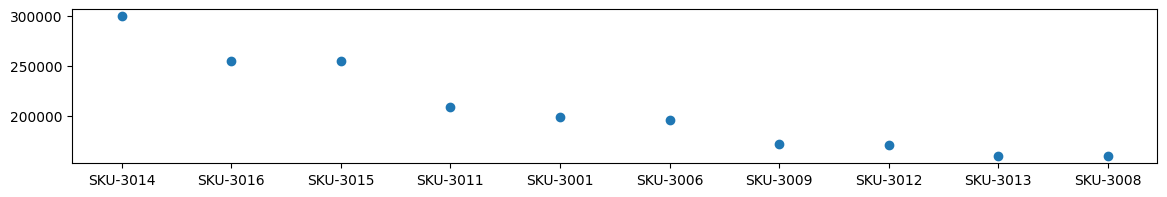

list_sku_category


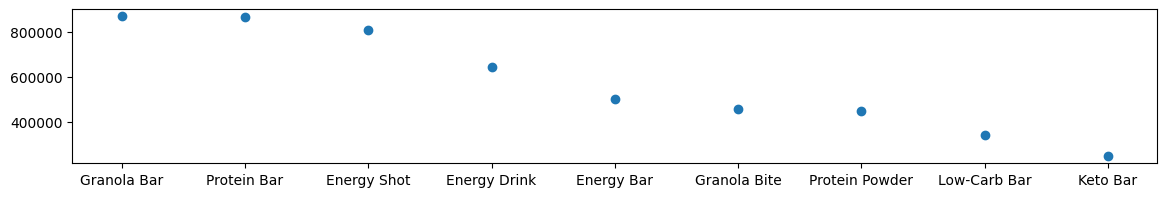

list_sku_flavor


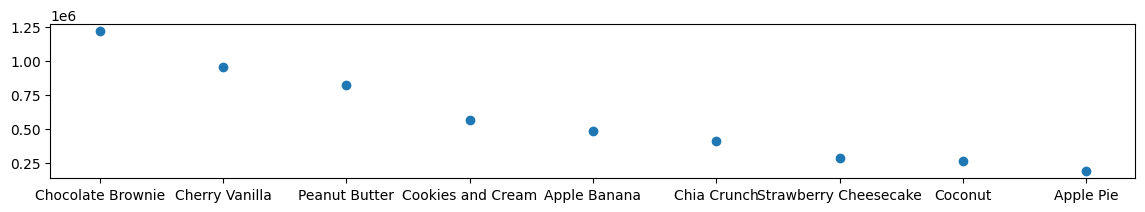

In [41]:
group_and_print(last_purchase_df, product_cols)

### Findings

Write some findings below.

* Granola is often the last item purchased, but it is also an item of non-power users.  So unclear if there's cause and effect here.  Could be that casual users buy the granola bars.

* Still an energy shot is a popular first product for customers who end up repeating.  Again, difficult to determine cause and effect.  But buying an energy shot may be a good predictor of a repeat customer.  

* Unclear how effective the loyalty program is.  Few customers are gold members.  The most popular is silver followed by none.  Which could indicate that users in general are not getting much out of it.  Could be worth looking at effectiveness, and what core users would want out of a loyalty program.
